<a href="https://colab.research.google.com/github/justin95214/logistic/blob/main/logistic_LSTM0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터 다운로드 받기

In [ ]:
!git clone https://github.com/justin95214/logistic.git

Cloning into 'logistic'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


2. 필요한 라이브러리 import 하기


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

import pandas as pd
#import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

3. 다운로드 받은 경로에서 데이터 읽기

In [ ]:
hour_select = 3
df= pd.read_csv("/content/logistic/TOP10_order_data_"+str(hour_select)+"h_pivot.csv")

print(df.head(10))

          491       11248       26451       30557       30559      31391  \
0   25.500000   40.666667   20.166667   19.833333   41.833333  18.166667   
1    4.333333   10.166667    4.333333    4.333333    9.333333   2.833333   
2   23.333333   17.500000   16.666667   17.666667   30.333333  10.500000   
3   45.500000   35.833333   37.000000   40.333333   65.333333  24.166667   
4  110.666667   75.000000   46.333333   68.166667   86.833333  28.666667   
5  143.833333   58.166667   57.166667   69.000000  103.000000  39.166667   
6  205.500000   78.833333   81.166667   93.666667  139.333333  47.833333   
7  306.500000  148.500000  116.833333  137.166667  211.333333  78.833333   
8   32.500000   20.833333   12.166667   14.000000   18.000000   9.166667   
9    8.500000    4.000000    3.333333    2.833333    4.166667   3.166667   

       35353       56791       60255      68232  hour        DATE  
0   9.500000   38.166667   24.166667  21.833333   1.0  2021-07-01  
1   2.166667    9.666667   

4. 크기가 50인 사이즈의 윈도우 생성하기 50개씩 읽고 다음 날짜 데이터 예측


4-1 10개 항목중에 3번째 항목 예측해보기

In [ ]:
ITEM_NUM =3
data = df[df.columns[ITEM_NUM]].values
seq_len = 40
sequence_length = seq_len + 1

result = []
for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

In [ ]:
ITEM_NUM =3
df.columns[ITEM_NUM],df.columns[-1]

data = df[[df.columns[ITEM_NUM],df.columns[-1]]].values

seq_len = 40
sequence_length = seq_len + 1

result_a = []
for index in range(len(data) - sequence_length):
        result_a.append(data[index: index + sequence_length])


In [ ]:
temp_list= []
for d in result_a:
        temp_list.append(list(map(lambda x: x[1], d)))

temp_list

[['2021-07-01',
  '2021-07-01',
  '2021-07-01',
  '2021-07-01',
  '2021-07-01',
  '2021-07-01',
  '2021-07-01',
  '2021-07-01',
  '2021-07-02',
  '2021-07-02',
  '2021-07-02',
  '2021-07-02',
  '2021-07-02',
  '2021-07-02',
  '2021-07-02',
  '2021-07-02',
  '2021-07-03',
  '2021-07-03',
  '2021-07-03',
  '2021-07-03',
  '2021-07-03',
  '2021-07-03',
  '2021-07-03',
  '2021-07-03',
  '2021-07-04',
  '2021-07-04',
  '2021-07-04',
  '2021-07-04',
  '2021-07-04',
  '2021-07-04',
  '2021-07-04',
  '2021-07-04',
  '2021-07-05',
  '2021-07-05',
  '2021-07-05',
  '2021-07-05',
  '2021-07-05',
  '2021-07-05',
  '2021-07-05',
  '2021-07-05',
  '2021-07-06'],
 ['2021-07-01',
  '2021-07-01',
  '2021-07-01',
  '2021-07-01',
  '2021-07-01',
  '2021-07-01',
  '2021-07-01',
  '2021-07-02',
  '2021-07-02',
  '2021-07-02',
  '2021-07-02',
  '2021-07-02',
  '2021-07-02',
  '2021-07-02',
  '2021-07-02',
  '2021-07-03',
  '2021-07-03',
  '2021-07-03',
  '2021-07-03',
  '2021-07-03',
  '2021-07-03',
  '2021

In [ ]:
result= []
for k in result_a:
        result.append(list(map(lambda x: x[0], k)))

result

[[19.83333333333333,
  4.333333333333333,
  17.666666666666668,
  40.333333333333336,
  68.16666666666667,
  69.0,
  93.66666666666669,
  137.16666666666666,
  14.0,
  2.833333333333333,
  15.666666666666666,
  36.833333333333336,
  41.333333333333336,
  54.0,
  81.33333333333333,
  113.5,
  6.833333333333333,
  2.6666666666666665,
  6.0,
  19.166666666666668,
  24.5,
  41.333333333333336,
  83.5,
  102.33333333333331,
  10.666666666666666,
  1.8333333333333333,
  10.0,
  24.666666666666668,
  35.0,
  57.16666666666666,
  89.66666666666667,
  129.16666666666666,
  17.833333333333332,
  4.0,
  12.0,
  27.33333333333333,
  68.66666666666667,
  69.5,
  108.33333333333331,
  164.0,
  19.33333333333333],
 [4.333333333333333,
  17.666666666666668,
  40.333333333333336,
  68.16666666666667,
  69.0,
  93.66666666666669,
  137.16666666666666,
  14.0,
  2.833333333333333,
  15.666666666666666,
  36.833333333333336,
  41.333333333333336,
  54.0,
  81.33333333333333,
  113.5,
  6.833333333333333,


In [ ]:
result[0], temp_list

([19.83333333333333,
  4.333333333333333,
  17.666666666666668,
  40.333333333333336,
  68.16666666666667,
  69.0,
  93.66666666666669,
  137.16666666666666,
  14.0,
  2.833333333333333,
  15.666666666666666,
  36.833333333333336,
  41.333333333333336,
  54.0,
  81.33333333333333,
  113.5,
  6.833333333333333,
  2.6666666666666665,
  6.0,
  19.166666666666668,
  24.5,
  41.333333333333336,
  83.5,
  102.33333333333331,
  10.666666666666666,
  1.8333333333333333,
  10.0,
  24.666666666666668,
  35.0,
  57.16666666666666,
  89.66666666666667,
  129.16666666666666,
  17.833333333333332,
  4.0,
  12.0,
  27.33333333333333,
  68.66666666666667,
  69.5,
  108.33333333333331,
  164.0,
  19.33333333333333],
 [['2021-07-01',
   '2021-07-01',
   '2021-07-01',
   '2021-07-01',
   '2021-07-01',
   '2021-07-01',
   '2021-07-01',
   '2021-07-01',
   '2021-07-02',
   '2021-07-02',
   '2021-07-02',
   '2021-07-02',
   '2021-07-02',
   '2021-07-02',
   '2021-07-02',
   '2021-07-02',
   '2021-07-03',
  

5. 항목별로 판매량 MinMaxScale하기 6. 데이터 분할하기 50 개 읽고 1개 예측 

In [ ]:


normalized_data = []
for window in result:
    normalized_window = [((p / window[0]) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)
print(result)
print(result.shape)

# split train and test data
row = int(round(result.shape[0] * 0.9))



train = result[:row, :]
train_d = temp_list[:row]

np.random.shuffle(train)
x_train = train[:, :-1]
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]


x_train_d = list(map( lambda x:x[:-1], train_d))
#x_train_d = train_d[:, :-1]
x_train_d = np.reshape(x_train_d, (x_train.shape[0], x_train.shape[1], 1))
y_train_d = x_train_d = list(map( lambda x:x[-1], train_d))

#x_test = temp_list[row:
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test_d = temp_list[row:]
y_test_d = list(map(lambda x:x[-1], y_test_d))


print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

[[ 0.00000000e+00 -7.81512605e-01 -1.09243697e-01 ...  4.46218487e+00
   7.26890756e+00 -2.52100840e-02]
 [ 0.00000000e+00  3.07692308e+00  8.30769231e+00 ...  3.68461538e+01
   3.46153846e+00  3.46153846e-01]
 [ 0.00000000e+00  1.28301887e+00  2.85849057e+00 ...  9.43396226e-02
  -6.69811321e-01 -2.26415094e-01]
 ...
 [ 0.00000000e+00  4.73372781e-02  7.81065089e-01 ... -6.74556213e-01
  -3.19526627e-01  3.01775148e-01]
 [ 0.00000000e+00  7.00564972e-01  1.59322034e+00 ... -3.50282486e-01
   2.42937853e-01  4.06779661e-01]
 [ 0.00000000e+00  5.24916944e-01 -9.50166113e-01 ... -2.69102990e-01
  -1.72757475e-01  2.62458472e-01]]
(575, 41)
(518, 40)
(518, 40, 1) (518,) (57, 40, 1) (57,)


7. 모델링에 필요한 라이브러리 import하기

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import SimpleRNN, Input, Dense, LSTM
from tensorflow.keras.layers import Bidirectional, TimeDistributed

In [ ]:
# 학습

model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(seq_len, 1)))
model.compile(loss='mse', optimizer='rmsprop')

model.summary()
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=100)



8. 모델학습

In [ ]:
# 학습

model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(seq_len, 1)))
model.add(SimpleRNN(64, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

model.summary()
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=100)




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 40, 50)            2600      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                7360      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,025
Trainable params: 10,025
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 3s 24ms/step - loss: 0.2001 - val_loss: 0.1231
Epoch 2/100
52/52 [==============================] - 1s 18ms/step - loss: 0.1127 - val_loss: 0.1039
Epoch 3/100
52/52 [==============================] - 1s 18ms/step - loss: 0.1041 - val_loss: 0.1031
Epoch 4/100
52

In [ ]:
for layer in model.layers:
  print(layer.get_weights()[0].shape, layer.get_config())
  print(layer.get_weights()[1].shape, layer.get_config())

(1, 50) {'name': 'simple_rnn', 'trainable': True, 'batch_input_shape': (None, 40, 1), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 50, 'activation': 'tanh', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0}
(50, 50) {'name': 'simple_rnn', 'trainable': True, 'batch_input_shape': (None, 40, 1), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'un

9. 모델 예측및 정답 그래프 보기

In [ ]:
len(model.layers[0].get_weights())


3

In [ ]:
model.layers[1].get_weights()[0].shape


(50, 256)

In [ ]:
model.layers[2].get_weights()[0].shape

(64, 1)

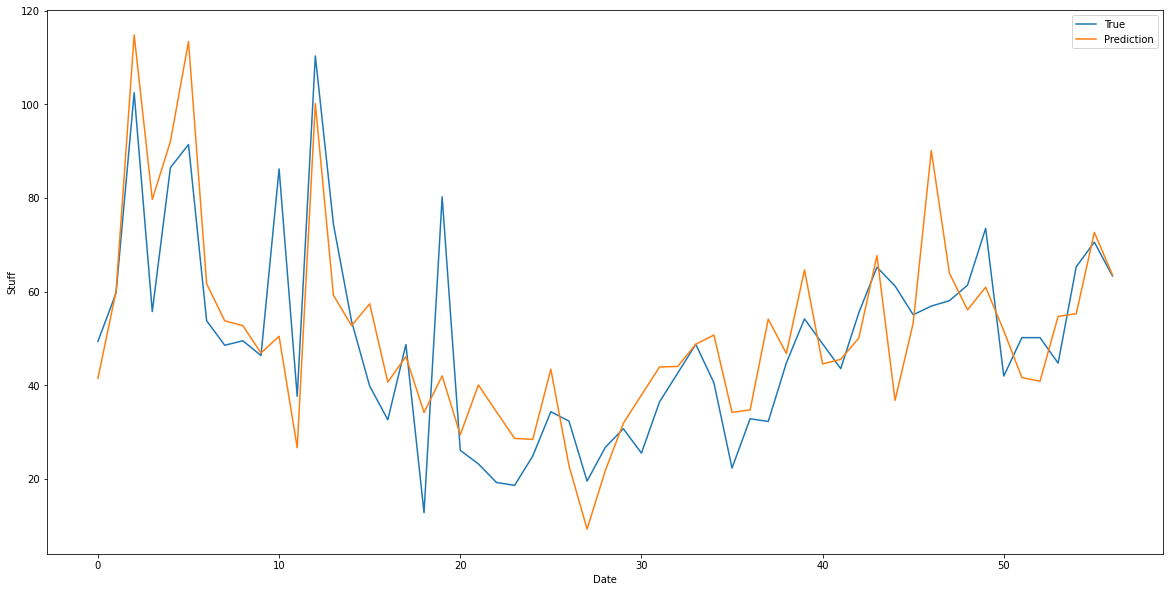

In [ ]:
import matplotlib.dates as mdates
pred = model.predict(x_test)


denormalized_data= [((p+1)* window[0]) for p in pred]
denormalized_answer= [((p+1)* window[0]) for p in y_test]
#denormalized_data.append(denormalized_window)

date_df = pd.DataFrame(y_test_d, columns=['date'])
date_df['date'] = pd.to_datetime(date_df['date'])

date_list = []




fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(denormalized_answer, label='True')
ax.plot(denormalized_data, label='Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Stuff')
dateFmt = mdates.DateFormatter('%Y-%m-%d')
#ax.xaxis.set_major_formatter(dateFmt)
#ax.set_xticks(y_test_d)
#ax.set_xlim([y_test_d[0],y_test_d[-1]])
ax.legend()
plt.show()

10. 예측값과 실제값 차이 계산

 MAE (Mean Absolute Error) - 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
 https://ichi.pro/ko/chucheon-siseutem-eul-pyeong-gahaneun-bangbeob-ui-jeonche-moglog-183670080086494

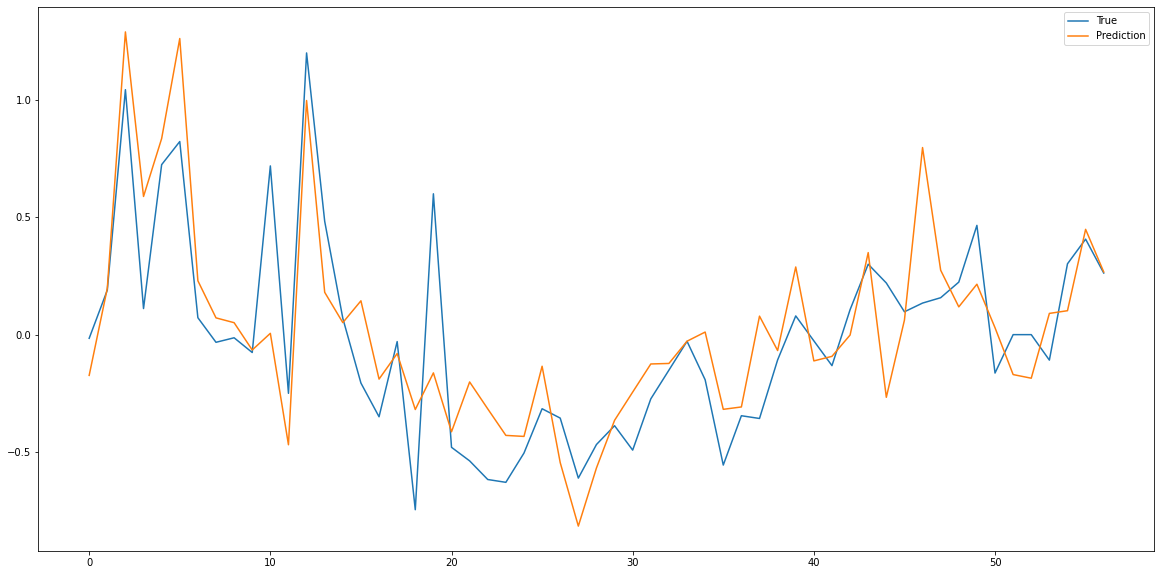

In [ ]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.37370620427184204